In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [4]:
f = r.TFile("./data/gm2offline_ana_version10.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [5]:
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana_version10.root	
 TFile*		./data/gm2offline_ana_version10.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   OBJ: TTree	eventTree	eventTree : 0 at: 0x7fffd7f347b0
   OBJ: TTree	eastTree	eastTree : 0 at: 0x7fffdb983a90
   OBJ: TTree	evwTree	evwTree : 0 at: 0x7fffdb8daed0
   OBJ: TTree	evwNoPartnerTree	evwNoPartnerTree : 0 at: 0x7fffdb930920
   OBJ: TTree	wveTree	wveTree : 0 at: 0x7fffdb929810
   OBJ: TTree	wveNoPartnerTree	wveNoPartnerTree : 0 at: 0x7fffdb8d0bd0
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	cal

In [6]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :   200047 : Total =        24890227 bytes  File  Size =   17306796 *
*        :          : Tree compression factor =   1.44                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   200047 : Total  Size=     802993 bytes  File Size  =       6846 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression= 117.17     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   200047 : Total  Size=     803083 bytes  File Size  =       6899 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression= 116.28     *
*...................................................

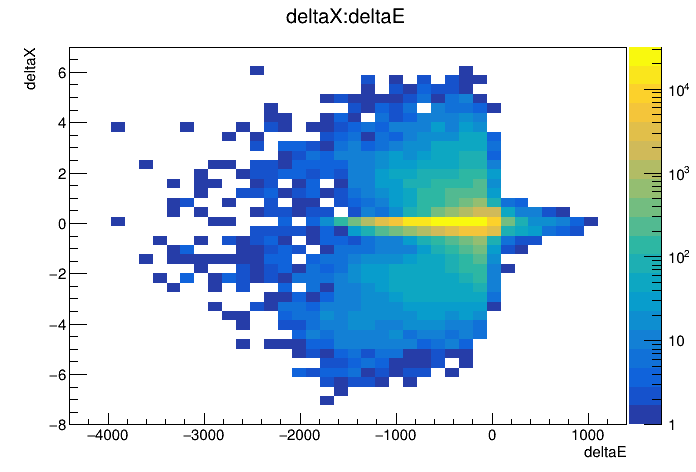

In [16]:
c = r.TCanvas()
tcomp.Draw("deltaX:deltaE","","colz")
c.SetLogz()
c.Draw()